In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # check how accurate
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from matplotlib import pyplot as plt

In [2]:
EXAMPLE_1 = '../data/lec_7/Example1.csv'
df = pd.read_csv(EXAMPLE_1)

In [3]:
df.head(5)

,X1,Y,Label
0,1,-3.76,1
1,5,-22.62,1
2,-4,2.73,0
3,6,-15.11,1
4,1,-9.09,1


In [4]:
X = np.array(df['X1']).reshape(-1, 1)  # shape to Nx1 matrix
y = df['Y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

In [6]:
reg = LinearRegression().fit(X_train, y_train)

In [7]:
print('Score:', reg.score(X_test, y_test))
print('Score Train:', reg.score(X_train, y_train))
print('Coef:', reg.coef_)
print('Intercept:', reg.intercept_)

lin_train_score = reg.score(X_train, y_train)
lin_test_score = reg.score(X_test, y_test)
lin_coef = reg.coef_
lin_intercept = reg.intercept_

Score: 0.8868176757399175
Score Train: 0.9011507141687665
Coef: [-2.24047905]
Intercept: -3.241112779696652


In [8]:
# ridge
ridge = Ridge(alpha=0.05).fit(X_train, y_train)

In [9]:
print('Score:', ridge.score(X_test, y_test))
print('Score Train:', ridge.score(X_train, y_train))
print('Coef:', ridge.coef_)
print('Intercept:', ridge.intercept_)

Score: 0.8868504067297529
Score Train: 0.9011507068539465
Coef: [-2.24027719]
Intercept: -3.2409950297315167


In [10]:
alpha = [0, 0.1, 10, 100]

for i in alpha:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    print('Alpha:', i)
    print('Score:', ridge.score(X_test, y_test))
    print('Score Train:', ridge.score(X_train, y_train))
    print('Coef:', ridge.coef_)
    print('Intercept:', ridge.intercept_)
    print('\n')

Alpha: 0
Score: 0.8868176757399175
Score Train: 0.9011507141687665
Coef: [-2.24047905]
Intercept: -3.241112779696652


Alpha: 0.1
Score: 0.8868831114920029
Score Train: 0.9011506849147581
Coef: [-2.24007537]
Intercept: -3.2408773009819534


Alpha: 10
Score: 0.8928580571790219
Score Train: 0.9008683376007782
Coef: [-2.2008187]
Intercept: -3.217977577813838


Alpha: 100
Score: 0.9131017286759233
Score Train: 0.8801407483539075
Coef: [-1.89837766]
Intercept: -3.041553632777708




In [11]:
ridge1 = Ridge(alpha=0.5).fit(X_train, y_train)
ridge2 = Ridge(alpha=50).fit(X_train, y_train)

lasso1 = Lasso(alpha=0.5).fit(X_train, y_train)
lasso2 = Lasso(alpha=50).fit(X_train, y_train)


In [12]:
def get_x(X ,slope, intercept):
    return np.dot(X, slope) + intercept

# def show_graph(x, y, lines):
#     fig = plt.figure(figsize=(18, 18))
#     plt.scatter(x, y, s=40, alpha=0.5)
    
#     for line in lines:
#         plt.plot(line[0], line[1], '--')
    
#     plt.show()

In [19]:
trains = []

# trains.append([X_train, reg.predict(X_train)])
# trains.append([X_train, ridge1.predict(X_train)])
# trains.append([X_train, ridge2.predict(X_train)])
# trains.append([X_train, lasso1.predict(X_train)])
# trains.append([X_train, lasso2.predict(X_train)])

trains.append([X_train, get_x(X_train, reg.coef_, reg.intercept_), 'LR'])
trains.append([X_train, get_x(X_train, ridge1.coef_, ridge1.intercept_), 'RD1'])
trains.append([X_train, get_x(X_train, ridge2.coef_, ridge2.intercept_), 'RD2'])
trains.append([X_train, get_x(X_train, lasso1.coef_, lasso1.intercept_), 'LS1'])
trains.append([X_train, get_x(X_train, lasso2.coef_, lasso2.intercept_), 'LS2'])


# show_graph(X_train, y_train, trains)

In [20]:
tests = []

# tests.append([X_test, reg.predict(X_test)])
# tests.append([X_test, ridge1.predict(X_test)])
# tests.append([X_test, ridge2.predict(X_test)])
# tests.append([X_test, lasso1.predict(X_test)])
# tests.append([X_test, lasso2.predict(X_test)])

tests.append([X_test, get_x(X_test, reg.coef_, reg.intercept_), 'LR'])
tests.append([X_test, get_x(X_test, ridge1.coef_, ridge1.intercept_), 'RD1'])
tests.append([X_test, get_x(X_test, ridge2.coef_, ridge2.intercept_), 'RD2'])
tests.append([X_test, get_x(X_test, lasso1.coef_, lasso1.intercept_), 'LS1'])
tests.append([X_test, get_x(X_test, lasso1.coef_, lasso1.intercept_), 'LS2'])


# show_graph(X_test, y_test, tests)

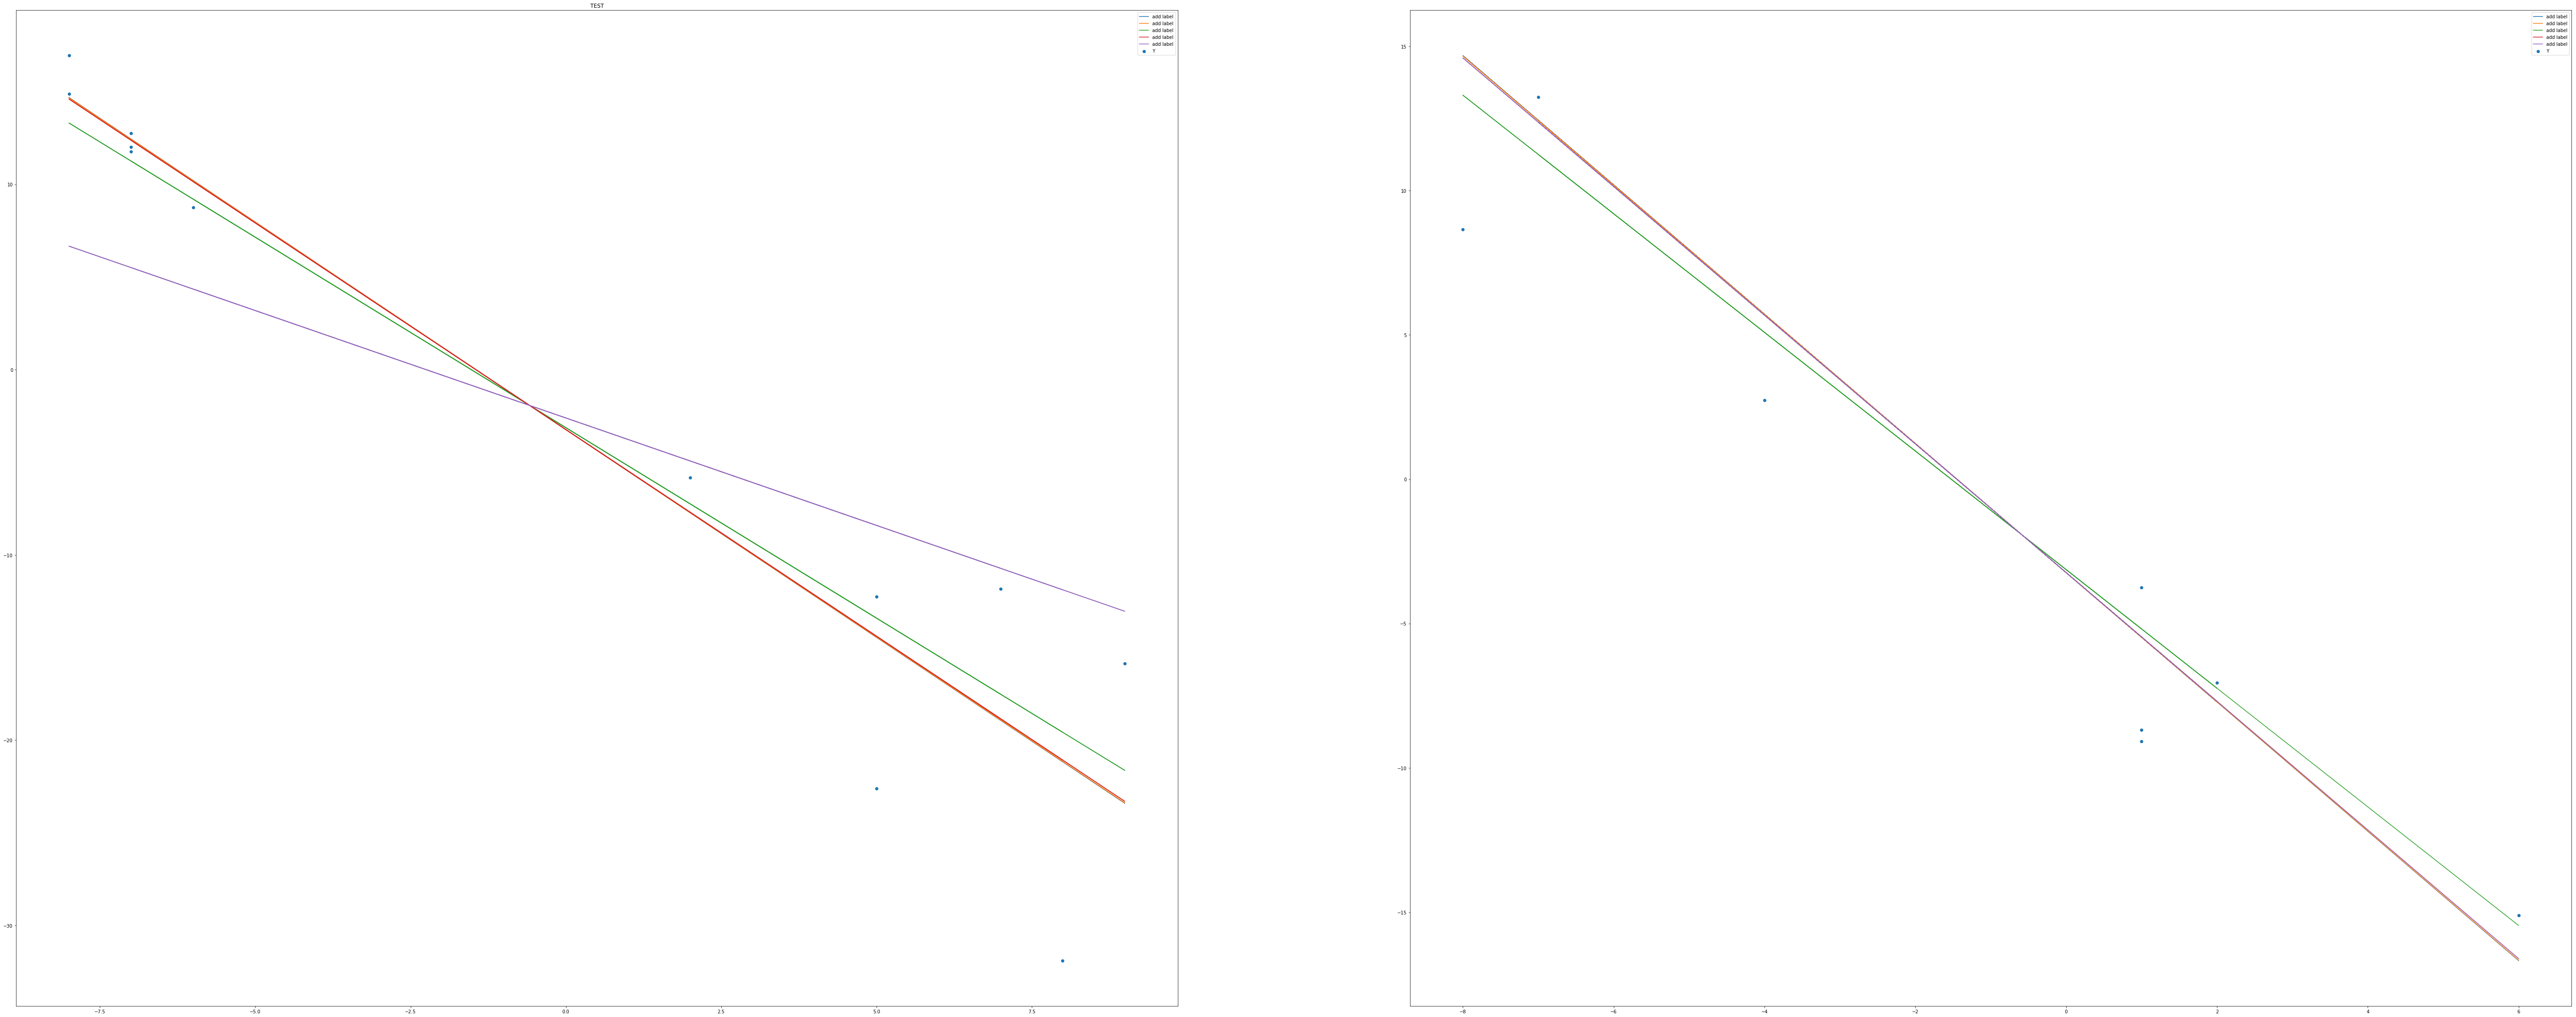

In [22]:
# Example from sir

fig, axes = plt.subplots(ncols=2, figsize=(100, 40))
axes[0].scatter(X_train, y_train)
axes[1].scatter(X_test, y_test)

for tr in trains:
    axes[0].plot(tr[0], tr[1], label='add label')

for ts in tests:
    axes[1].plot(ts[0], ts[1], label='add label')
    
axes[0].set_title('TRAIN')
axes[0].set_title('TEST')
axes[0].legend()
axes[1].legend()